# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [1]:
# Librerias
# Se llama para operaciones numéricas y vectoriales
import numpy as np
# Se llama para ver o representar datos y gráficos
import matplotlib.pyplot as plt
# Se llama para el análisis de los datos de una tabla
import pandas as pd
# Se emplea cuando se van a emplear cálculos factoriales
from math import factorial
# Esto es una funcion para llamar un raíz
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

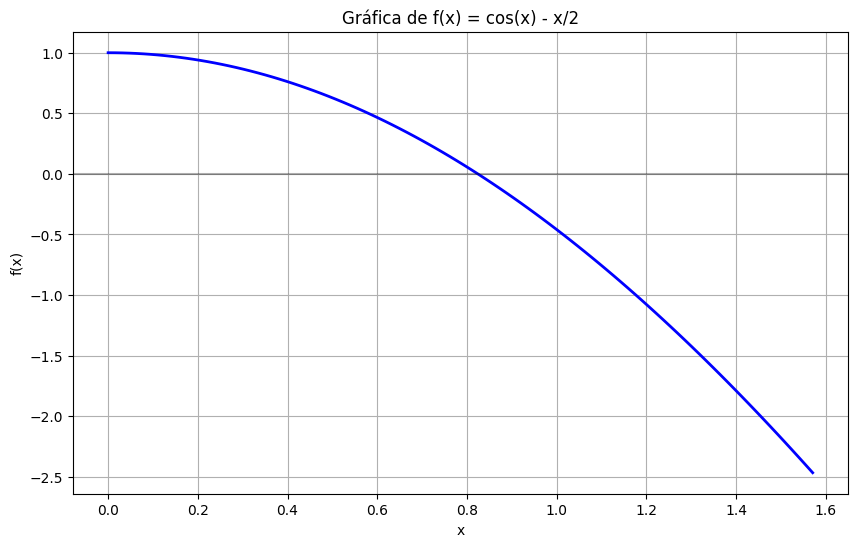

In [19]:
# Aquí va su código

def Steffensen( f, x0, tol=1e-8, max_iter=100):
  '''
  Metodo para encontrar raices
  Entradas
  '''
  xn = x0
  iteraciones = 0
  for i in range(max_iter):
    iteraciones +=1
    yn = xn + f(xn)
    denominador = f(yn) - f(xn)

# división diferente de cero
    if abs(denominador) < 1e-15:
       print(f"Advertencia: Denominador cercano a cero en iteración {i+1}.")
    break

# Calcular el x_1
    xn_plus_1 = xn - (f(xn)**2) / denominador

# Convergencia
    if abs(xn_plus_1 - xn) < tol:
            xn = xn_plus_1
    break

# x_n para la siguiente iteración
    xn = xn_plus_1

# Máximo de iteraciones
    if iteraciones >= max_iter:
     print(f"Advertencia: Se alcanzó el número máximo de iteraciones ({max_iter}).")
    return xn, iteraciones



def f(x):
  return np.cos(x) - x**2

# Graficar la función en el intervalo [0, π/2]
x_values = np.linspace(0, np.pi/2, 100)
y_values = [f(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'b-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Gráfica de f(x) = cos(x) - x/2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Crear DataFrame con valores de x y f(x)
df = pd.DataFrame({'x': x_values,'f(x)': y_values})

# Encontrar valor más cercano a cero para hacer una aproximación inical
df['abs_f'] = df['f(x)'].abs()
aproximacion_inicial = df.loc[df['abs_f'].idxmin()]['x']






  #CONCLUSIONES SOBRE LA CONVERGENCIA
  # 1. Metodo de steffensen






#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





In [4]:
# Aqui va su código

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Función para calcular el doble factoria
    def doble_factorial(n):
        """ calcula únicamente el doble factorial n!!"""
    if n <= 0:
       return 1
    else:
      resultado = 1
      for i in range (1, n+1, 2):
        resultado *= i
      return resultado

# Calcular los coeficientes cn de la serie del péndulo
  def calcular_cn(n):
        """calcula el coeficeinte cn de la serie del péndulo"""
      if n <= 0:












IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)